In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("Dataset/test.tsv",delimiter="\t")


In [17]:
df = df.drop('Unnamed: 0',1)

In [22]:
df

,sequence,label
0,CAGGT AGGTG GGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,9
1,GAAGT AAGTA AGTAC GTACA TACAA ACAAC CAACT AACT...,23
2,GAGGT AGGTG GGTGC GTGCA TGCAA GCAAC CAACT AACT...,5
3,GAGGT AGGTG GGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,20
4,CAGGT AGGTG GGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,31
...,...,...
751,GAGGT AGGTG GGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,1
752,GAAGT AAGTG AGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,8
753,GAGGT AGGTG GGTGC GTGCA TGCAG GCAGC CAGCT AGCT...,15
754,GAGGT AGGTG GGTGC GTGCA TGCAG GCAGT CAGTT AGTT...,1


In [23]:
df.sample(512).to_csv("Dataset/test.tsv",sep="\t",index=False)

In [1]:
def seq2kmer(seq, k):
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [3]:
data = pd.read_csv("Dataset_Complete.csv",index_col=0)
data

In [5]:
FiveMers = []
FourMers = []
ThreeMers = []
for idx, row in data.iterrows():
    FiveMers.append(seq2kmer(row['Raw_Sequence'], 5))
    FourMers.append(seq2kmer(row['Raw_Sequence'], 4))
    ThreeMers.append(seq2kmer(row['Raw_Sequence'], 3))

In [6]:
data['5Mers'] = FiveMers
data['4Mers'] = FourMers
data['3Mers'] = ThreeMers
data.to_csv("kmerCompleteData.csv")

In [9]:
train_set, val_set = train_test_split(data, test_size=0.3)
val_set, test_set = train_test_split(val_set, test_size=0.5)

In [11]:
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)

In [14]:
trainTags = train_set.VGene_Tag.unique()
valTags = val_set.VGene_Tag.unique()
testTags = test_set.VGene_Tag.unique()

In [21]:
train_set.to_csv("trainData.csv")
test_set.to_csv("testData.csv")
val_set.to_csv("valData.csv")

In [19]:
i = 0
from ast import literal_eval

for id, rows in df.iterrows():
    print("As Str: Enc: "+str(len(rows['Encoded_Sequence'])))
    print("As Lis: Enc: "+str(len(literal_eval(rows['Encoded_Sequence']))))
    print("As Str: Raw: "+str(len(rows['Raw_Sequence'])))
    print("Tag: "+ str(rows['VGene_Tag']))
    print(rows['VGene_Name'])
    print("========")
    if(i<10):
        i+=1
    else:
        break

As Str: Enc: 1083
As Lis: Enc: 361
As Str: Raw: 361
Tag: 35
IGHV5-51
As Str: Enc: 1083
As Lis: Enc: 361
As Str: Raw: 361
Tag: 1
IGHV3-23
As Str: Enc: 1074
As Lis: Enc: 358
As Str: Raw: 358
Tag: 27
IGHV3-48
As Str: Enc: 1092
As Lis: Enc: 364
As Str: Raw: 364
Tag: 38
IGHV3-43
As Str: Enc: 1038
As Lis: Enc: 346
As Str: Raw: 346
Tag: 16
IGHV4-59
As Str: Enc: 1065
As Lis: Enc: 355
As Str: Raw: 355
Tag: 2
IGHV4-39
As Str: Enc: 1092
As Lis: Enc: 364
As Str: Raw: 364
Tag: 50
IGHV7-4-1
As Str: Enc: 1065
As Lis: Enc: 355
As Str: Raw: 355
Tag: 7
IGHV3-73
As Str: Enc: 1119
As Lis: Enc: 373
As Str: Raw: 373
Tag: 32
IGHV4-61
As Str: Enc: 1083
As Lis: Enc: 361
As Str: Raw: 361
Tag: 35
IGHV5-51
As Str: Enc: 1119
As Lis: Enc: 373
As Str: Raw: 373
Tag: 24
IGHV3-15


In [2]:
import pandas as pd 

d_train = pd.read_csv("trainData.csv")
d_val = pd.read_csv("valData.csv")
d_test = pd.read_csv("testData.csv")

print(d_train.shape , "----" , d_val.shape , " ---", d_test.shape)

(202141, 8) ---- (43316, 8)  --- (43317, 8)


In [7]:
import csv 
csv.writer(open('Dataset/5/dev.tsv', 'w+'), delimiter='\t').writerows(csv.reader(open("valData.csv")))
tf_train = pd.read_csv("Dataset/5/dev.tsv", sep = "\t")
tf_train = tf_train.drop(["Encoded_Sequence","Raw_Sequence","VGene_Name", "4Mers","3Mers",'Unnamed: 0'], axis=1)
print(tf_train.columns)
tf_train.rename(columns={"VGene_Tag" : "label", "5Mers" : "sequence"}, inplace=True)
tf_train = tf_train[["sequence", "label"]]
print(tf_train.columns)
tf_train.to_csv("Dataset/5/dev.tsv", sep="\t", index=False)

# labels_string = [str(int) for int in tf_train["VGene_Tag"].tolist()] 

# print(sorted(set(labels_string)))

Index(['VGene_Tag', '5Mers'], dtype='object')
Index(['sequence', 'label'], dtype='object')


In [8]:
df = pd.read_csv("Dataset/5/train.tsv", sep = "\t")
arr = df["label"].unique()
labels_string = [str(int) for int in arr]
print(sorted(labels_string))
print(len(labels_string))
df = pd.read_csv("Dataset/5/dev.tsv", sep = "\t")
arr = df["label"].unique()
labels_string = [str(int) for int in arr]
print(sorted(labels_string))
print(len(labels_string))
df = pd.read_csv("Dataset/5/test.tsv", sep = "\t")
arr = df["label"].unique()
labels_string = [str(int) for int in arr]
print(sorted(labels_string))
print(len(labels_string))


['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9']
63
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '52', '53', '54', '55', '56', '57', '58', '6', '62', '7', '8', '9']
59
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4', '40', '41', '42', '43', '44', '45', '46', '47', '49', '5', '50', '52', '53', '54

In [4]:
import numpy as np
ff = np.load("/home/mr/Workspace/Team8993/THESIS/DNABERT/result/5/5/atten.npy")
ff.shape

(225, 508)

<Figure size 1000x1000 with 0 Axes>

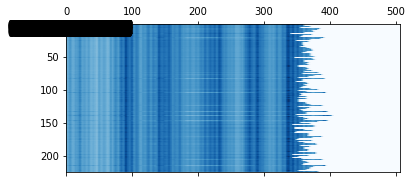

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)
import numpy as np
ff = np.load("/home/mr/Workspace/Team8993/THESIS/DNABERT/result/5/5/atten.npy")
fig, ax = plt.subplots()


ax.matshow(ff, cmap=plt.cm.Blues)

for i in range(15):
    for j in range(15):
        c = ff[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
